In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import *
x = symbols("x")

In [2]:
def showPoly(s):
    print("\nPolynomial", s, sep = "\n")
    print("\nSimplified", simplify(parse_expr(s)), sep = "\n")
    print("\nBy Powers", r := collect(expand(parse_expr(s)), x), sep = "\n")
    return r

In [3]:
def Lagrange(xInput, yInput, p = None):
    n, s = len(xInput), ""
    print(n, "points:")
    for i in range(n): print("\tf(", xInput[i], ") = ", yInput[i], sep = "")
    for i in range(n):
        p = str(yInput[i])
        for j in range(n):
            if i != j:
                p += "*(x - " + str(xInput[j]) + ")/(" + str(xInput[i]) + " - " + str(xInput[j]) + ")"
        s += (" + " if i else "") + p
    return showPoly(s)

In [4]:
xInput = (8.1, 8.3, 8.6)
yInput = (16.944410, 17.56492, 18.50515)

(77, 15)
(77,)
(77,)
(77,)


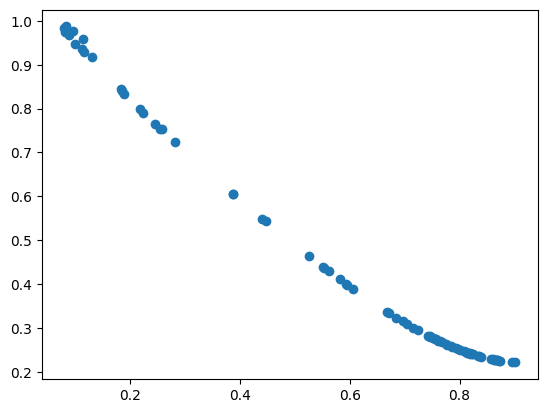

In [5]:
samples = np.loadtxt("../experiments/1676302198Population.txt")
fitness = np.loadtxt("../experiments/1676302198Fitness.txt")
shForces = np.loadtxt("../experiments/1676302198ShForces.txt")
shMoments = np.loadtxt("../experiments/1676302198ShMoments.txt")


print(samples.shape)
print(fitness.shape)
print(shForces.shape)
print(shMoments.shape)
plt.scatter(shForces, shMoments)

In [6]:
pf = np.arange(shForces.shape[0])
for i in range(shForces.shape[0]):
    for j in range(shForces.shape[0]):  
        if shForces[i] < shForces[j] and shMoments[i] < shMoments[j]:
            pf[j] = -1
pf = np.where(pf != -1)
shForces = shForces[pf]
shMoments = shMoments[pf]
fitness = fitness[pf]
alpha = (fitness - shMoments)/(shForces - shMoments)

In [7]:
xInput, yInput = shForces, alpha

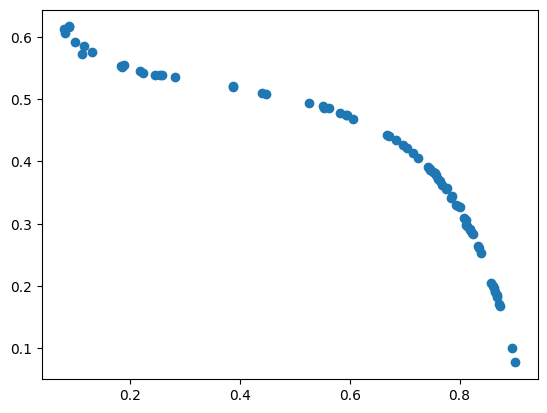

In [8]:
plt.scatter(xInput, yInput)

In [9]:
f, e = Lagrange(xInput, yInput), 8.4
print("\ng(", e, ") ≈ ", N(f.subs(x, e)), sep = "")

73 points:
	f(0.7561766000063185) = 0.377648717269985
	f(0.7966349391175427) = 0.32822802883295144
	f(0.6708992226309645) = 0.4412843285609497
	f(0.7510117134744076) = 0.3825217836985131
	f(0.44101738424887477) = 0.5102344571777622
	f(0.8392301663800743) = 0.2527040606706909
	f(0.18962728279285418) = 0.554632260716062
	f(0.38710529242528546) = 0.5189766376896867
	f(0.8244515598877153) = 0.28348222894760366
	f(0.5819733563893081) = 0.4774539169602117
	f(0.2551571136454558) = 0.5383896829216013
	f(0.7636001694296263) = 0.36828522078779585
	f(0.833085551469634) = 0.2638674022484032
	f(0.894842118436127) = 0.10043573586061824
	f(0.8198097092207584) = 0.2899153070218897
	f(0.524997865952732) = 0.49332245076756076
	f(0.2577345422609725) = 0.5385167426849764
	f(0.8233619120325844) = 0.2848688360157261
	f(0.7156559256367778) = 0.41283295985581664
	f(0.11283402196971695) = 0.5730964430539223
	f(0.7240820508122935) = 0.4061201640145135
	f(0.5625140788691856) = 0.485713066449728
	f(0.089579823994

In [14]:
mi, ma = np.min(xInput), np.max(xInput)
xEval = np.arange(mi, ma, 0.01)
a = [N(f.subs(x, e)) for e in xEval]

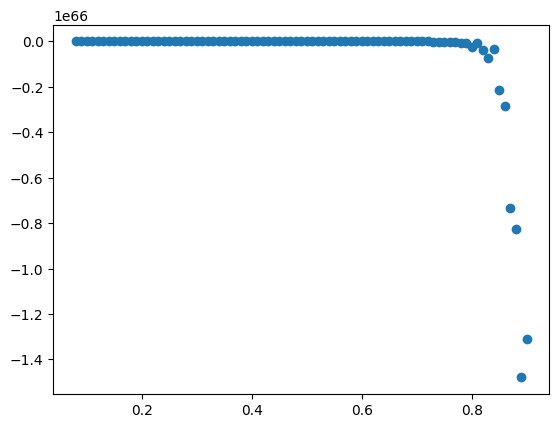

In [17]:
plt.scatter(xEval, a)

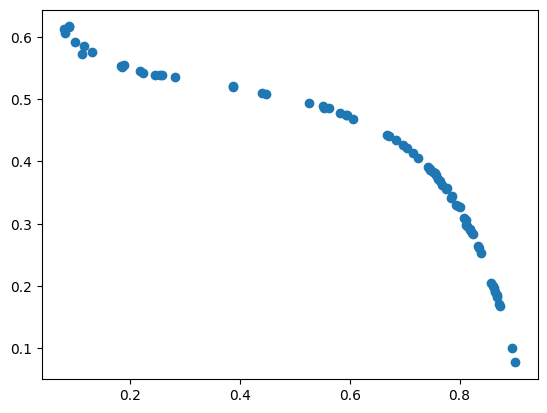

In [18]:
plt.scatter(xInput, yInput)